**Problem Statement:**
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import os
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import joblib
%matplotlib inline

###### Uploading the dataset

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### EDA

In [3]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (7043, 21)


In [4]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### 3 columns are of numeric type rest all are categorical type.

##### Converting Total charges into numeric type

In [6]:
df['TotalCharges']=pd.to_numeric(df.TotalCharges,errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Checking for missing value 

In [8]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### Filling the null values

In [9]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### Mising values in Total Charges filled.

In [11]:
# Checking uniqueness

for i in df.columns:
    print (i,':',len(df[i].unique()))

customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


##### Univariate analysis

Male      3555
Female    3488
Name: gender, dtype: int64


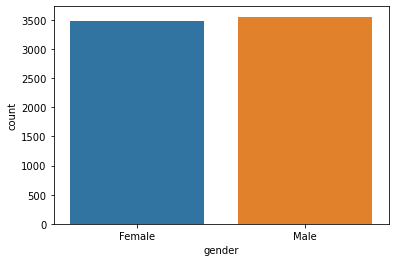

In [12]:
sn.countplot(df['gender'])
print (df['gender'].value_counts())

###### Majority of the customers are Male

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


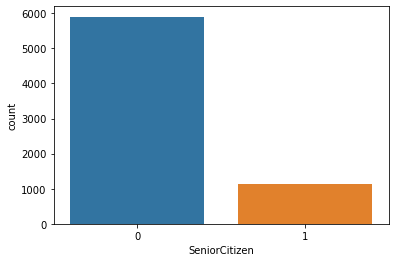

In [13]:
sn.countplot(df['SeniorCitizen'])
print (df['SeniorCitizen'].value_counts())

###### There are 5901 younger customers while 1142 Senior Citizens

No     3641
Yes    3402
Name: Partner, dtype: int64


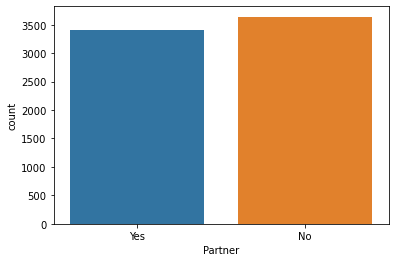

In [14]:
sn.countplot(df['Partner'])
print (df['Partner'].value_counts())

###### 3402 people have partners while 3641 dont have partners

No     4933
Yes    2110
Name: Dependents, dtype: int64


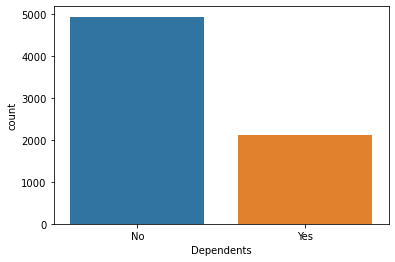

In [15]:
sn.countplot(df['Dependents'])
print (df['Dependents'].value_counts())

###### 2110 people are dependents while 4933 are not

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


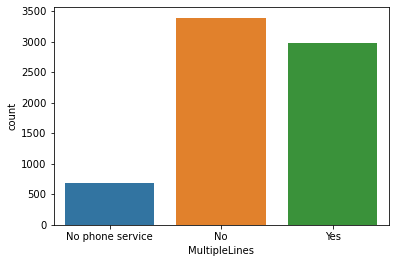

In [16]:
sn.countplot(df['MultipleLines'])
print (df['MultipleLines'].value_counts())

###### 682 people are not using any phone service, 3390 people are not using multiple lines while 2971 people are using multiple lines

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


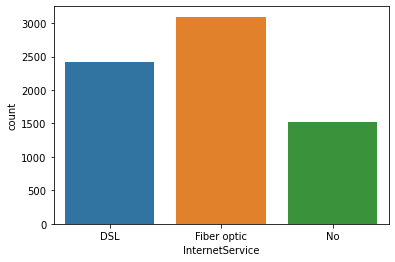

In [17]:
sn.countplot(df['InternetService'])
print (df['InternetService'].value_counts())

###### 2421 people are using DSL service, 3096 people are using fibre optics while 1526 people are not using and internet service

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


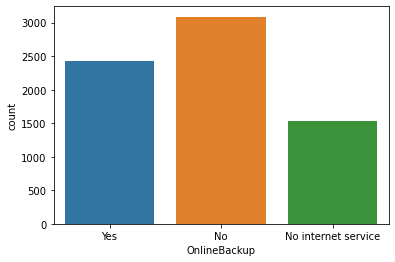

In [18]:
sn.countplot(df['OnlineBackup'])
print (df['OnlineBackup'].value_counts())

###### 3048 people dont use Online backup, 2429 people use online backup and 1526 people dont have any internet service

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


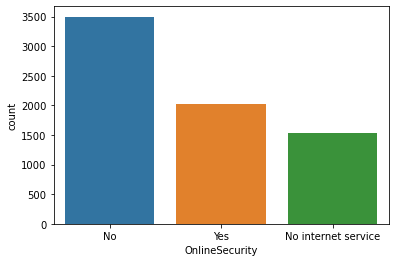

In [19]:
sn.countplot(df['OnlineSecurity'])
print (df['OnlineSecurity'].value_counts())

###### 3498 people are not using any online security, 2019 people are using online security and 1526 are not using any internet service

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


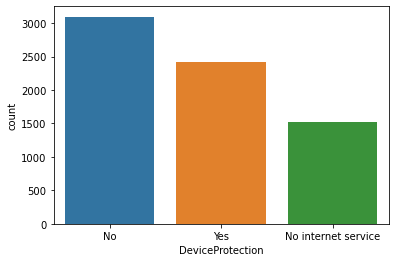

In [20]:
sn.countplot(df['DeviceProtection'])
print (df['DeviceProtection'].value_counts())

##### 3095 people dont use device protection, 2422 people use device protection while 1526 dont have any internet service

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


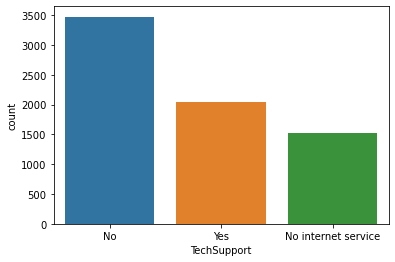

In [21]:
sn.countplot(df['TechSupport'])
print (df['TechSupport'].value_counts())

###### 3473 people dont use any tech support, 2044 people use and 1526 people dont have any internet service

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


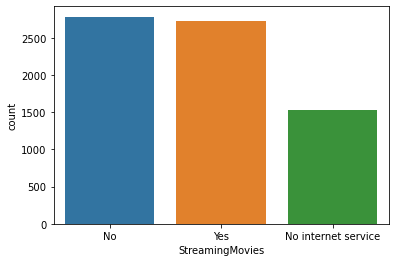

In [22]:
sn.countplot(df['StreamingMovies'])
print (df['StreamingMovies'].value_counts())

###### 2785 people dont stream movies, 2732 people stream movies and 1526 have no internet service

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


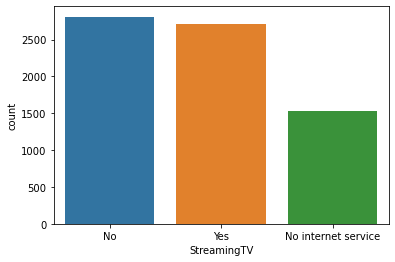

In [23]:
sn.countplot(df['StreamingTV'])
print (df['StreamingTV'].value_counts())

###### 2810 dont stream TV, 2707 stream TV and 1526 have no internet service

<AxesSubplot:xlabel='Churn', ylabel='count'>

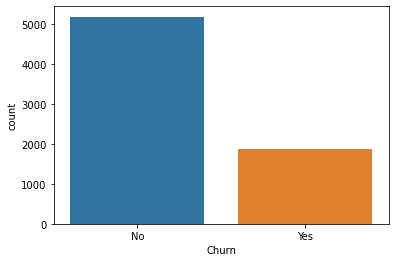

In [24]:
sn.countplot(df['Churn'])

##### Class imbalance for target varaiable variable

### Bivaraite Analysis

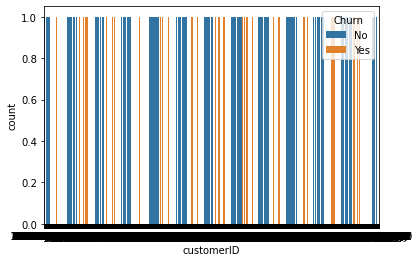

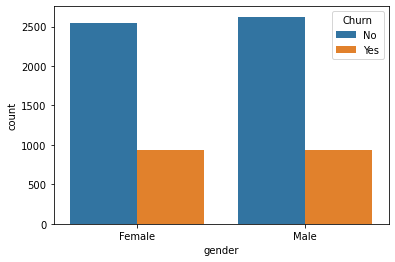

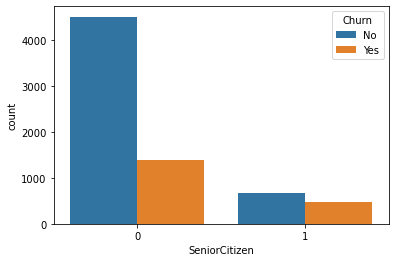

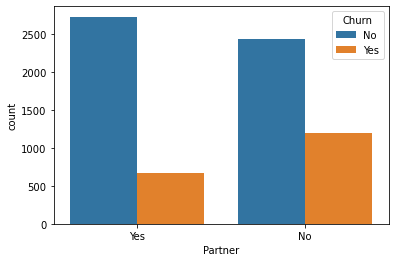

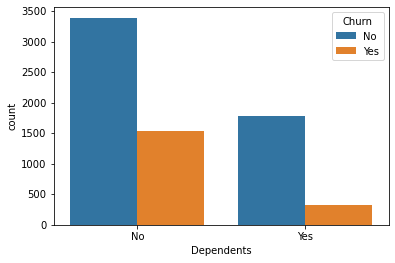

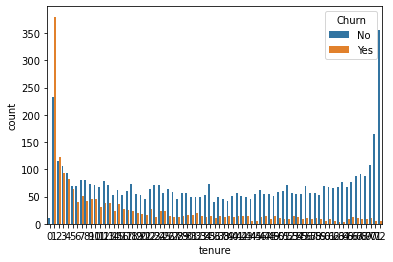

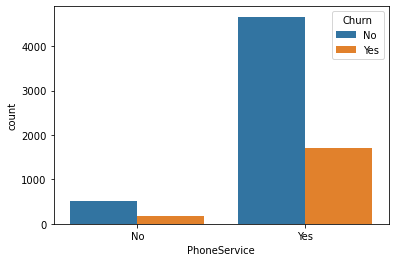

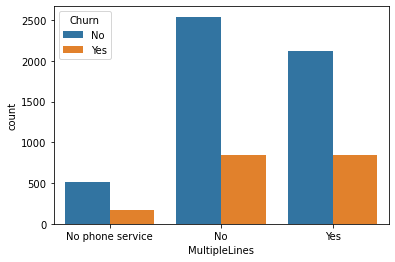

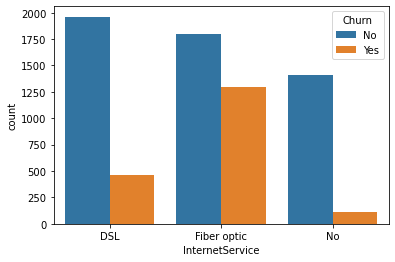

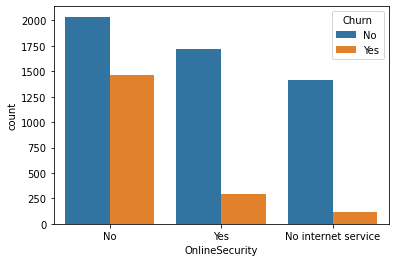

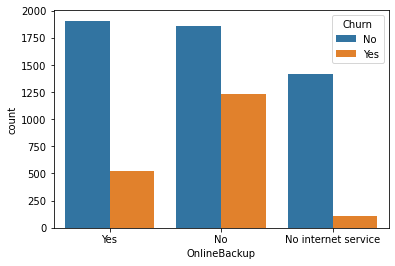

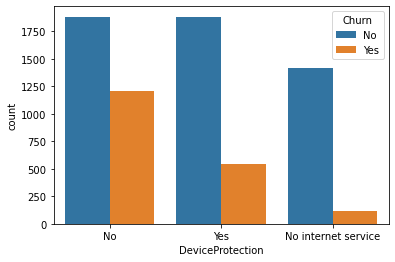

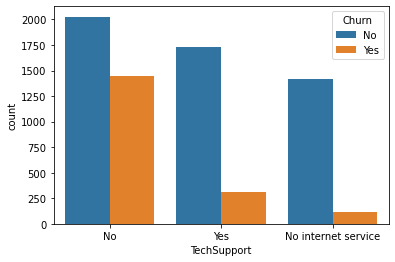

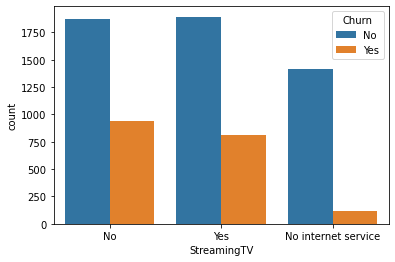

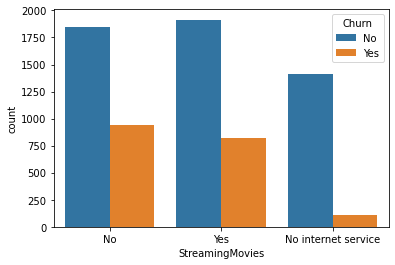

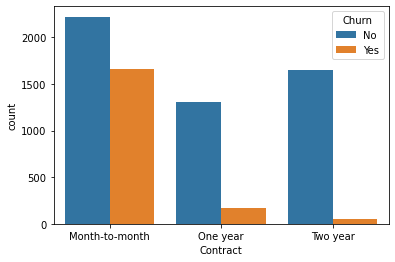

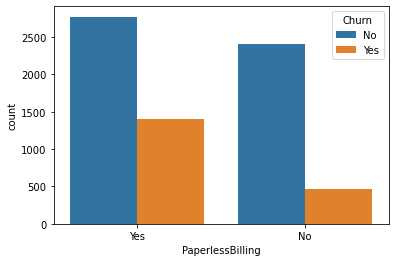

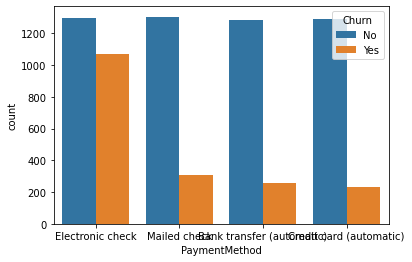

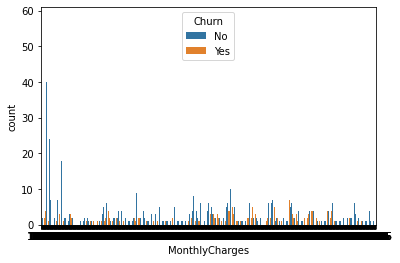

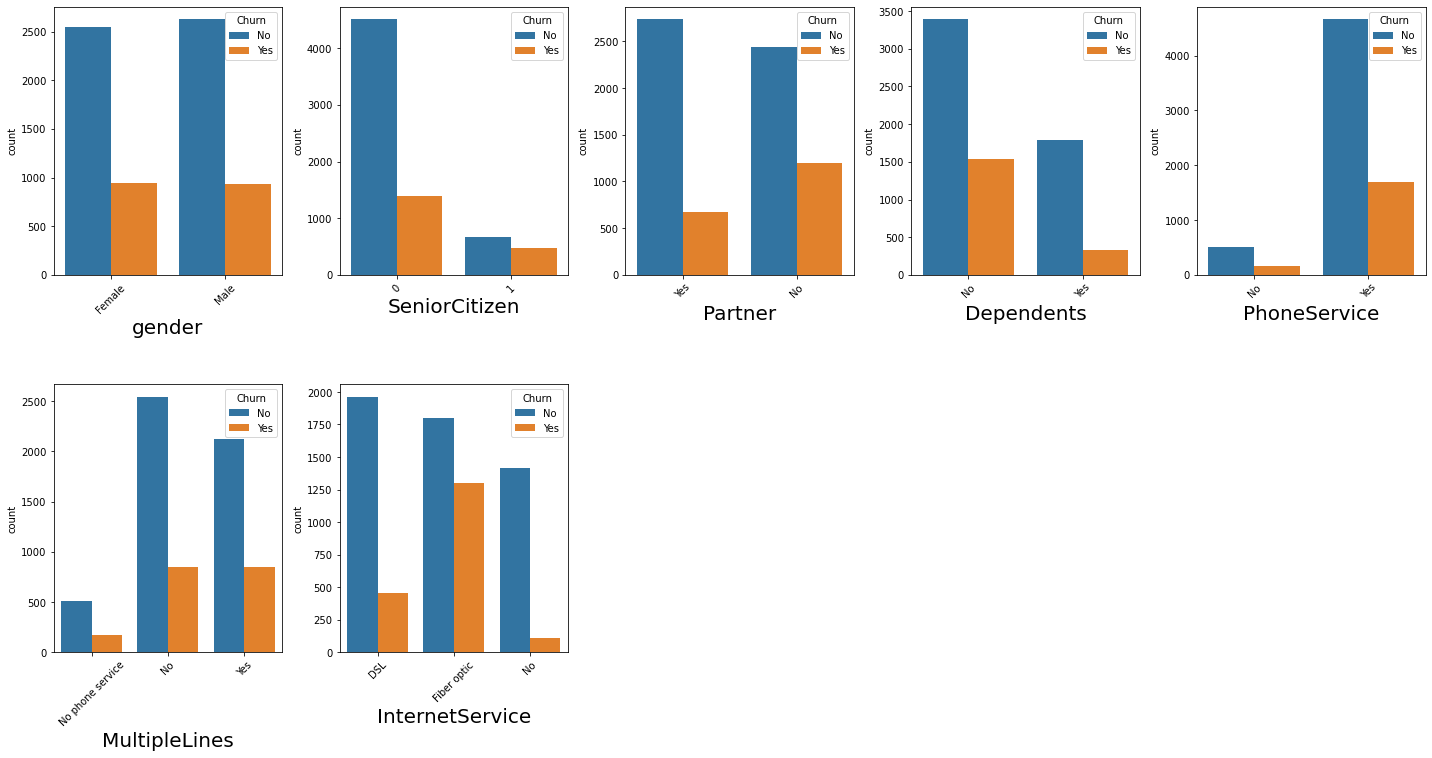

In [31]:
col = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
         'PhoneService', 'MultipleLines', 'InternetService']]

plt.figure(figsize=(20,25))
plotnumber=1

for column in col:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sn.countplot(col[column],hue=df.Churn)
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation=45)
    plotnumber+=1
plt.tight_layout()

-Both Male and Female are almost equally churned.
-Churn rate of Senior Citizens are high.
-Customer without partner has more Churn rate.
-Churn Rate is high for no dependents.
-Churn Rate is high for Phone Service
-For those who have fiber optic Internet , churn rate is very high.
-Customers are churned equally for having or not having multiple lines but, less chured if they do not have phone service

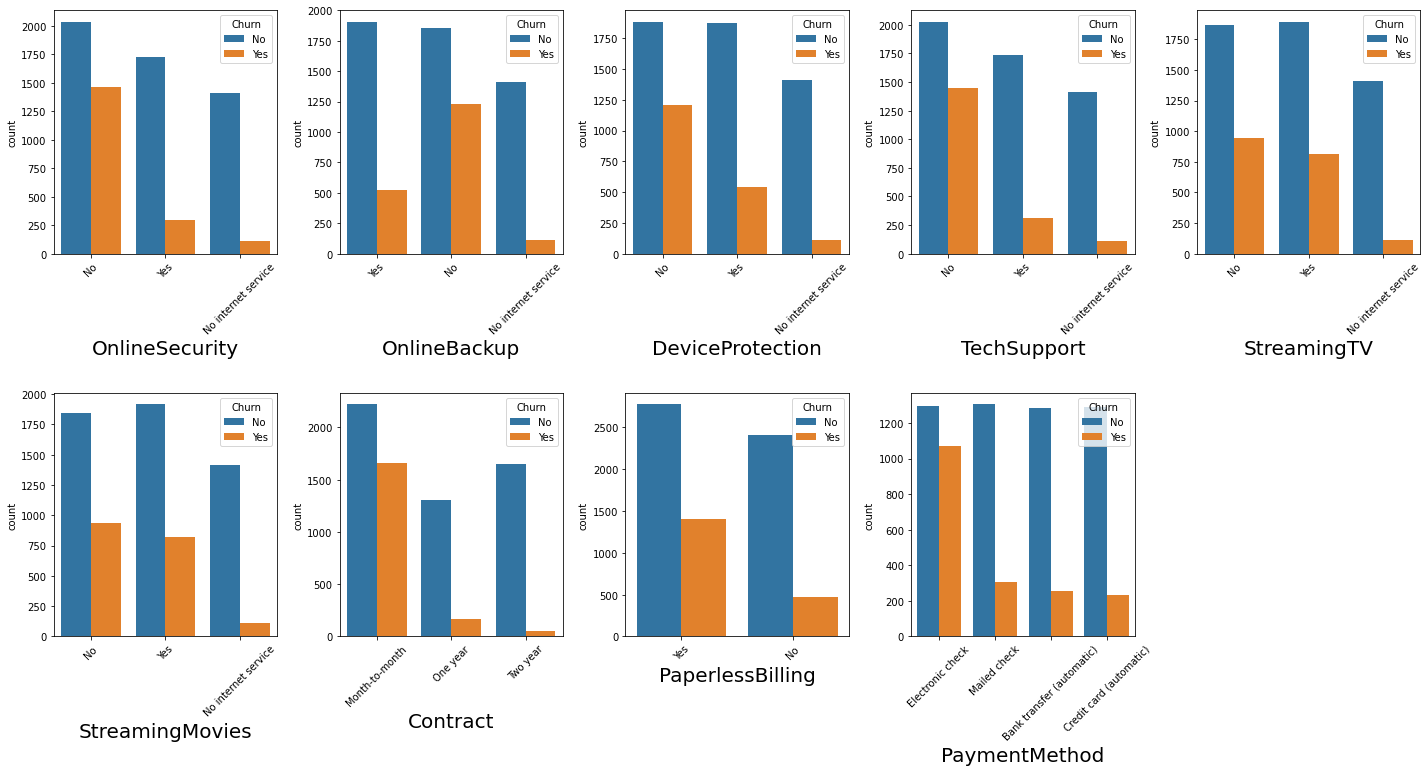

In [33]:
col2=df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']]

plt.figure(figsize=(20,25))
plotnumber=1

for column in col2:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sn.countplot(col2[column],hue=df.Churn)
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation=45)
    plotnumber+=1
plt.tight_layout()

Customer are churned if there is No :
Online security,Online Backup,Device Protection,Tech Support,Streaming TV and Movies.
Customers are less churned if there is :
Automatic Payments, Yearly Contract, No internet service

In [34]:
df.customerID.value_counts()

4361-BKAXE    1
8672-OAUPW    1
7054-ENNGU    1
1448-CYWKC    1
3727-JEZTU    1
             ..
6265-SXWBU    1
4717-GHADL    1
9102-OXKFY    1
4671-VJLCL    1
1955-IBMMB    1
Name: customerID, Length: 7043, dtype: int64

In [35]:
df=df.drop(['customerID'],axis=1)

#### Converting categorical into numerical type

In [36]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [37]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


### Statistical Summary

In [38]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


##### Variance in quartile range means there might be some outliers

### Multivaraiate ANalysis

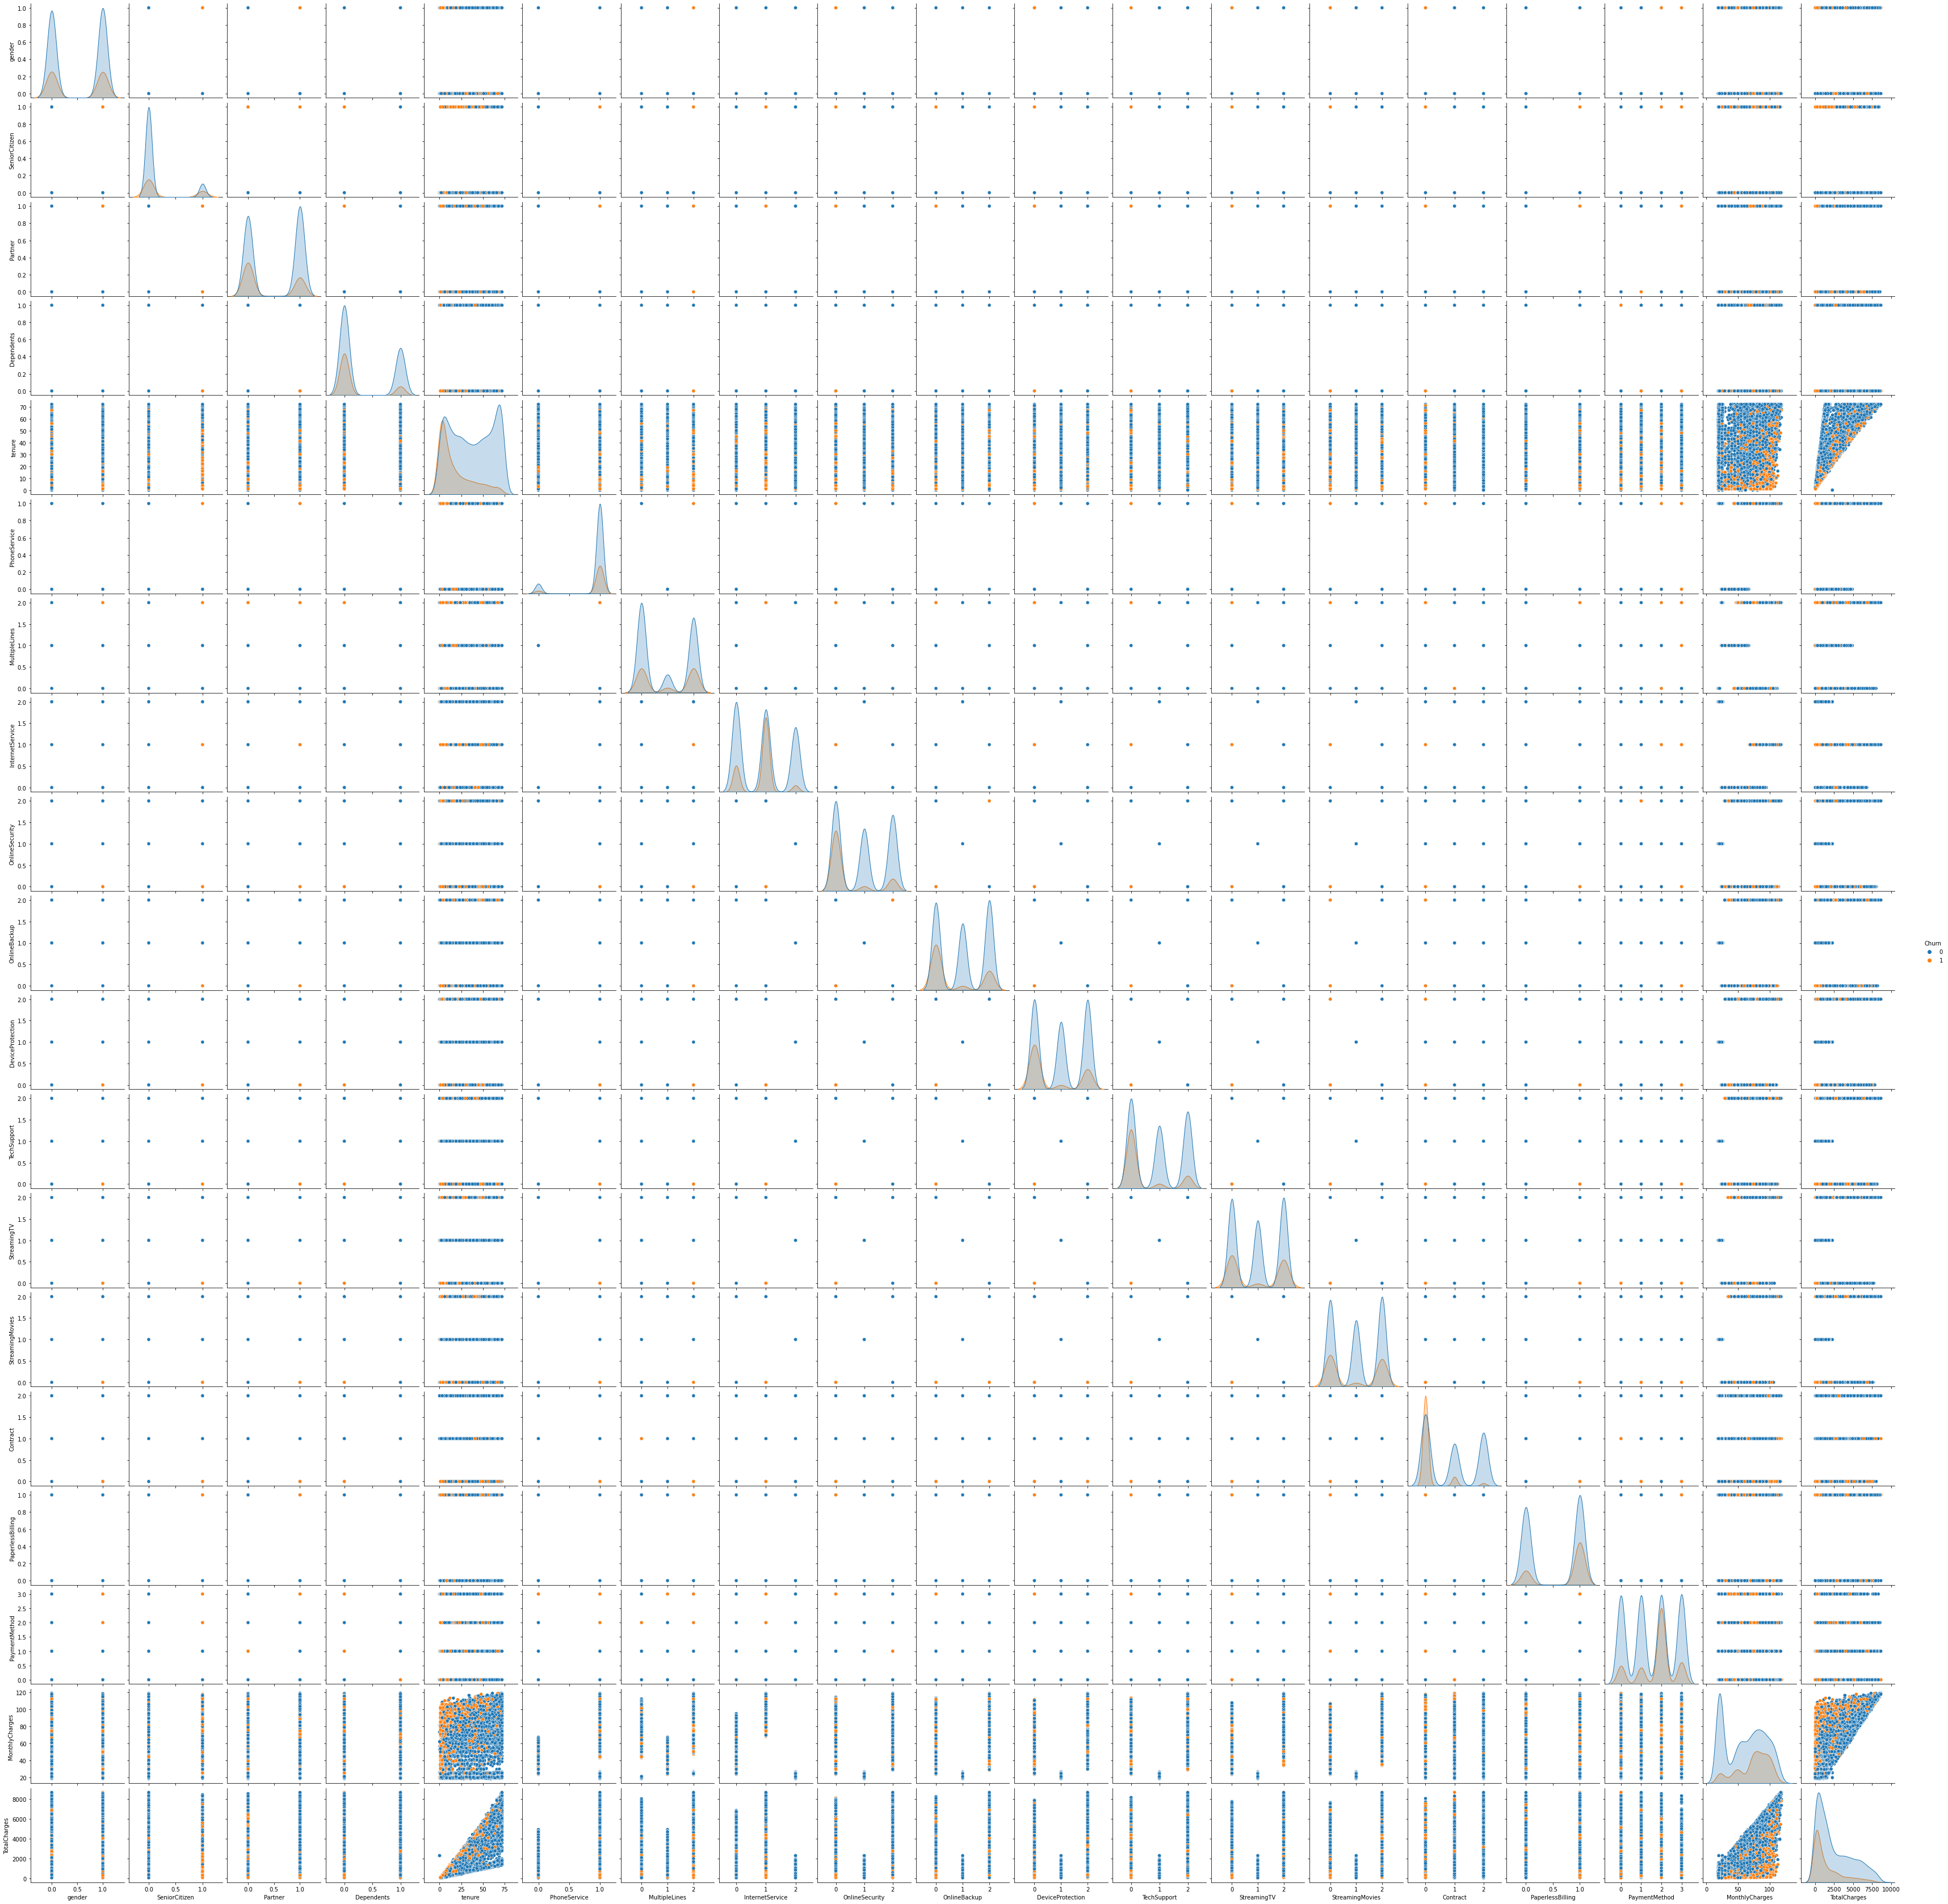

In [41]:
sn.pairplot(df,hue='Churn',diag_kind='kde')

#### class imbalance

In [42]:
print('Number of Churn no are:',df['Churn'].value_counts()[0])
print('Number of Churn yes are:',df['Churn'].value_counts()[1])
print('Unbalanced dataset' if df['Churn'].value_counts()[0]!=df['Churn'].value_counts()[1] else 'Balanced dataset')

Number of Churn no are: 5174
Number of Churn yes are: 1869
Unbalanced dataset


<AxesSubplot:>

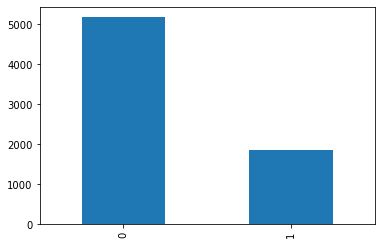

In [43]:
df['Churn'].value_counts().plot(kind='bar')

In [44]:
dfmin=df[df['Churn']==1]
dfmax=df[df['Churn']==0]
dfminup=resample(dfmin,replace=True,n_samples=5174,random_state=123)
dff=pd.concat([dfmax, dfminup])
print('Number of Churn no are:',dff['Churn'].value_counts()[0])
print('Number of Churn yes are:',dff['Churn'].value_counts()[1])
print('Unbalanced dataset' if dff['Churn'].value_counts()[0]!=dff['Churn'].value_counts()[1] else 'Balanced dataset')

Number of Churn no are: 5174
Number of Churn yes are: 5174
Balanced dataset


### Correlation

In [45]:
dff.corr()['Churn']

gender             -0.011790
SeniorCitizen       0.158551
Partner            -0.190106
Dependents         -0.193446
tenure             -0.414914
PhoneService        0.013177
MultipleLines       0.023004
InternetService    -0.064153
OnlineSecurity     -0.349469
OnlineBackup       -0.211308
DeviceProtection   -0.207116
TechSupport        -0.333443
StreamingTV        -0.044773
StreamingMovies    -0.063642
Contract           -0.486865
PaperlessBilling    0.223647
PaymentMethod       0.130716
MonthlyCharges      0.223598
TotalCharges       -0.244420
Churn               1.000000
Name: Churn, dtype: float64

##### using heatmap 

<AxesSubplot:>

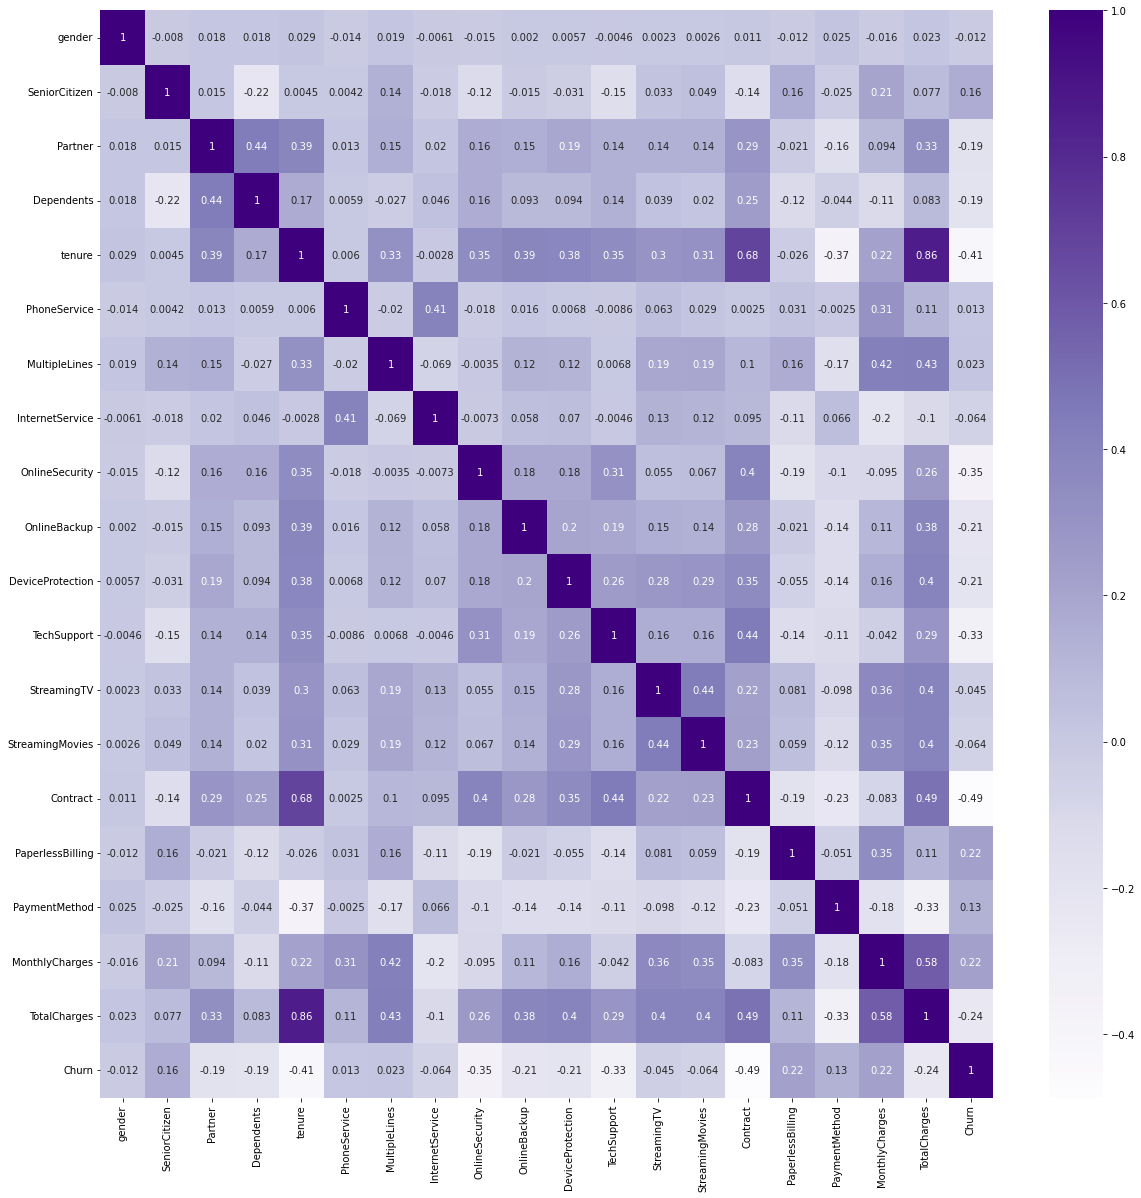

In [48]:
plt.figure(figsize=[20,20])
sn.heatmap(dff.corr(),annot=True,cmap='Purples')

<AxesSubplot:>

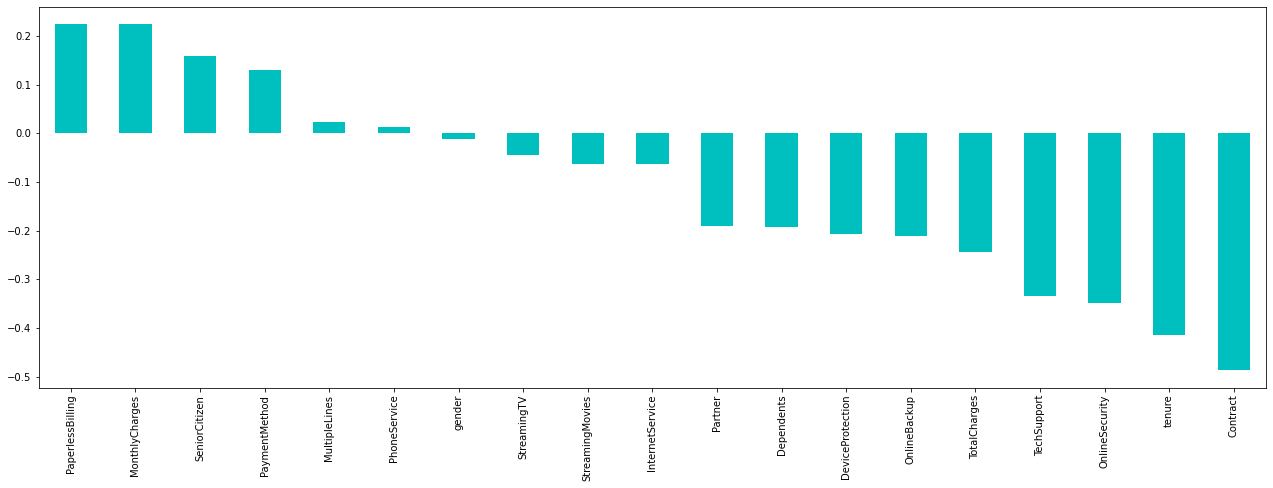

In [51]:
plt.figure(figsize=(22,7))
dff.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')

##### Dropping Column with least correlation

In [52]:
dff=dff.drop(['MultipleLines','PhoneService','gender'],axis=1)

##### Checking Distribution plots

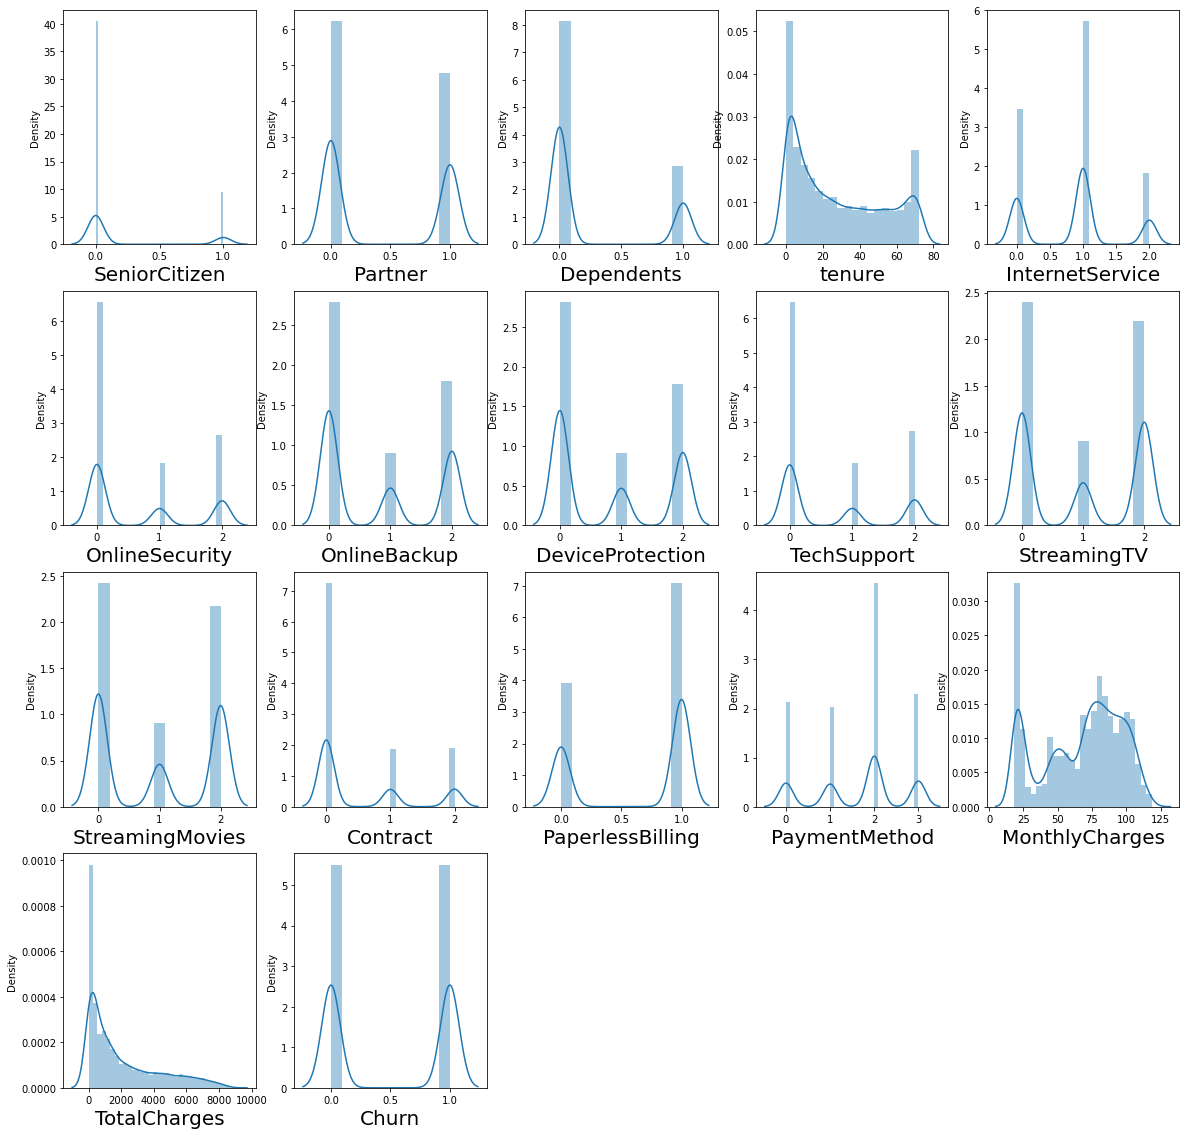

In [53]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in dff.columns:
    if plotnumber<=len(dff.columns):
        ax=plt.subplot(5,5,plotnumber)
        sn.distplot(dff[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Dist plot of TotalCharges is normally distributed (positively skewed). 
rest all are bimodial plots

##### Check for Outliers

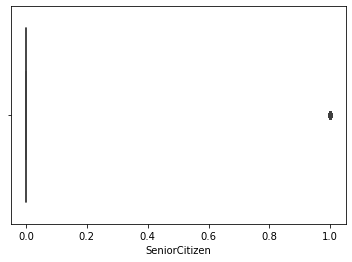

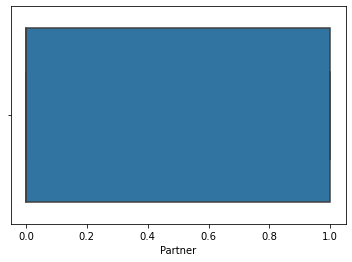

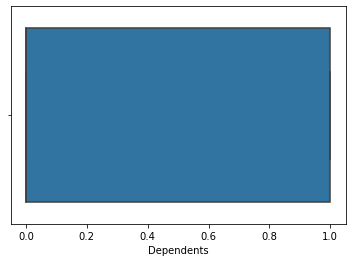

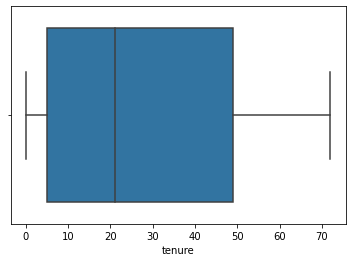

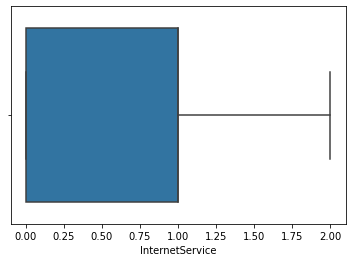

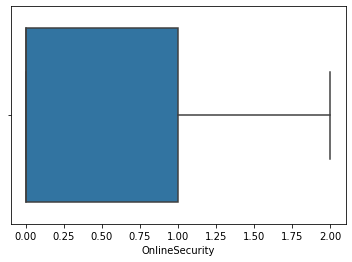

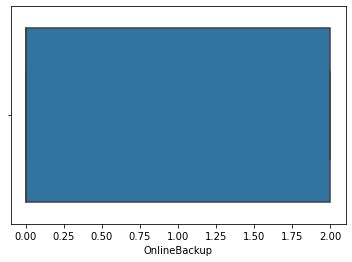

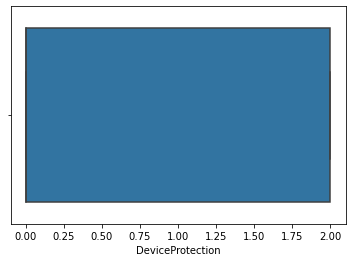

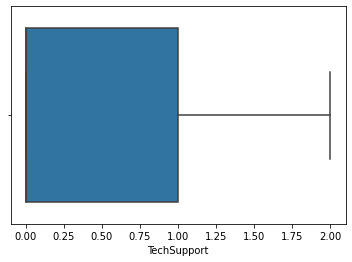

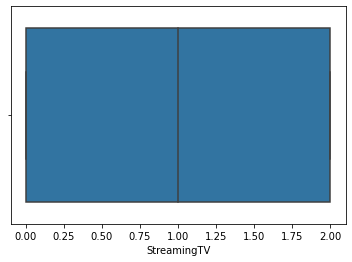

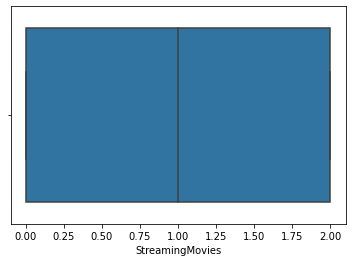

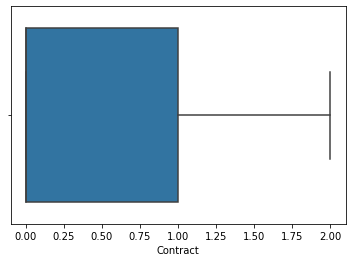

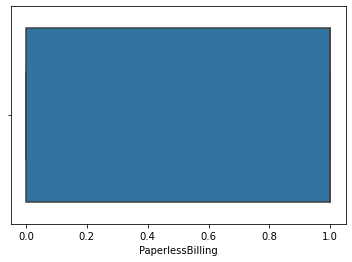

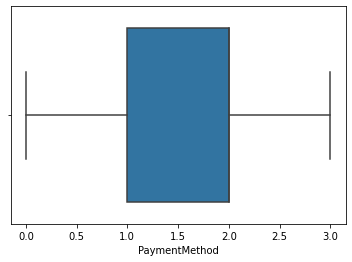

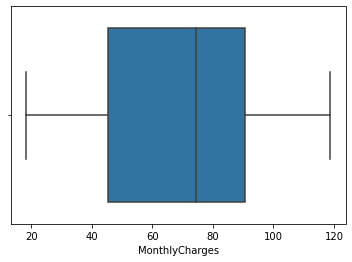

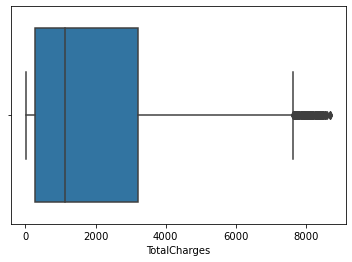

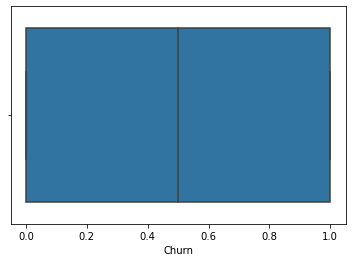

In [54]:
for i in dff.columns:
    sn.boxplot(dff[i])
    plt.show()

#### No need to remove outliers as outliers of categorical columns are valid 

In [55]:
y = dff[['Churn']]
x = dff.drop(columns = ['Churn'])

#### Skewness Check 

In [56]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

SeniorCitizen       1.571968
Partner             0.266382
Dependents          1.094739
tenure              0.518136
InternetService     0.190745
OnlineSecurity      0.744596
OnlineBackup        0.359449
DeviceProtection    0.374243
TechSupport         0.708654
StreamingTV         0.071150
StreamingMovies     0.089111
Contract            1.081034
PaperlessBilling   -0.595807
PaymentMethod      -0.332627
MonthlyCharges     -0.382938
TotalCharges        1.136185
dtype: float64
6


In [57]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [58]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

SeniorCitizen       1.571968
Partner             0.266382
Dependents          1.094739
tenure              0.518136
InternetService     0.190745
OnlineSecurity      0.445551
OnlineBackup        0.359449
DeviceProtection    0.374243
TechSupport         0.413327
StreamingTV         0.071150
StreamingMovies     0.089111
Contract            0.728134
PaperlessBilling   -0.595807
PaymentMethod      -0.332627
MonthlyCharges     -0.382938
TotalCharges        0.152955
dtype: float64
3


##### Skewness of total charges is removed hence output is valid 

##### Find the best features using Univariate Selection

In [59]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

               Specs         Score
3             tenure  37406.051509
14    MonthlyCharges   6293.755511
11          Contract   1908.463559
15      TotalCharges   1779.462041
5     OnlineSecurity   1123.494580
8        TechSupport   1031.773478
6       OnlineBackup    451.970439
7   DeviceProtection    436.603184
2         Dependents    286.573978
1            Partner    211.673347


In [60]:
newdf=x[['tenure','MonthlyCharges','Contract','TotalCharges','OnlineSecurity','TechSupport']]
newdf['Churn']=y
newdf

,tenure,MonthlyCharges,Contract,TotalCharges,OnlineSecurity,TechSupport,Churn
0,1,29.85,0.0,3.102045,0.000000,0.000000,0
1,34,56.95,1.0,12.362766,1.259921,0.000000,0
3,45,42.30,1.0,12.255516,1.259921,1.259921,0
6,22,89.10,0.0,12.492048,0.000000,0.000000,0
7,10,29.75,0.0,6.708432,1.259921,0.000000,0
...,...,...,...,...,...,...,...
6526,49,100.60,1.0,17.178793,0.000000,1.259921,1
3301,1,69.60,0.0,4.113420,0.000000,0.000000,1
3621,2,24.40,0.0,3.318658,0.000000,0.000000,1
6600,3,29.70,0.0,4.509445,1.259921,0.000000,1


##### Feature Scaling

In [61]:
scaler = StandardScaler()
newdf[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(newdf[['tenure','MonthlyCharges','TotalCharges']])

In [62]:
y = newdf[['Churn']]
x = newdf.drop(columns = ['Churn'])

In [63]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        tmp=roc_auc_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum roc_auc_score is at random state :",random," and it is :",score)

### Model buildind & Evaluation

In [64]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),RidgeClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),SGDClassifier(),
       LGBMClassifier(),XGBClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),
       QuadraticDiscriminantAnalysis(),CalibratedClassifierCV(),LinearSVC(),NuSVC(),
       LinearDiscriminantAnalysis(),RidgeClassifierCV(),GaussianNB(),BernoulliNB(),
        PassiveAggressiveClassifier(),Perceptron(),DummyClassifier()]

In [65]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.20,stratify=y)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='roc_auc')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if roc_auc_score(y_test,y_pred)>score:
        diff=roc_auc_score(y_test,y_pred)-score
        print('roc bigger')
    else:
        diff=score-roc_auc_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('roc',roc_auc_score(y_test,y_pred))
    print('diff',diff)

**********
LogisticRegression()
score 0.8412012778598832
roc 0.7628019323671498
diff 0.07839934549273342
roc bigger
**********
DecisionTreeClassifier()
score 0.8558324777798069
roc 0.8724637681159421
diff 0.016631290336135196
**********
KNeighborsClassifier()
score 0.8506527671636087
roc 0.7884057971014493
diff 0.0622469700621594
**********
RandomForestClassifier()
score 0.936991536503584
roc 0.8826086956521738
diff 0.05438284085141021
**********
SVC()
score 0.8167913434689229
roc 0.7613526570048309
diff 0.055438686464092
**********
RidgeClassifier()
score 0.84121221585104
roc 0.7647342995169083
diff 0.0764779163341317
**********
BaggingClassifier()
score 0.9229813974006129
roc 0.8729468599033816
diff 0.0500345374972313
**********
GradientBoostingClassifier()
score 0.8582124799600678
roc 0.7884057971014492
diff 0.06980668285861857
**********
SGDClassifier()
score 0.8290271363771934
roc 0.7570048309178743
diff 0.07202230545931909
**********
LGBMClassifier()
score 0.8856619550338506
roc 

#### ExtraTreesClassifier is the best model against all metrics

#### Hyperparamaters Tuning

In [66]:
parameters={'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],'class_weight':['balanced', 'balanced_subsample'],
            'max_depth':list(range(3,36))}
clf = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5,scoring="roc_auc",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1980 out of 1980 | elapsed:  8.0min finished


{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 28,
 'max_features': 'auto'}

#### Finding Best random state

In [67]:
besttrain(ExtraTreesClassifier(max_depth=28,criterion='gini',max_features='auto',class_weight='balanced'),x,y)

maximum roc_auc_score is at random state : 107  and it is : 0.9082125603864735


#### fit the best model

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 107,test_size=0.20,stratify=y)
classmodel=ExtraTreesClassifier(max_depth=28,criterion='gini',max_features='auto',class_weight='balanced')
classmodel.fit(x_train,y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=28)

#### check all the metrics of the model

In [69]:
y_pred=classmodel.predict(x_test)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(classmodel,x,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[901 134]
 [ 57 978]]
f1 score is :  0.9110386585933861
classification report 
               precision    recall  f1-score   support

           0       0.94      0.87      0.90      1035
           1       0.88      0.94      0.91      1035

    accuracy                           0.91      2070
   macro avg       0.91      0.91      0.91      2070
weighted avg       0.91      0.91      0.91      2070

AUC ROC Score:  0.9077294685990337
CV mean 0.9660848456500094
std: 0.00411073975261229


#### Test on the full dataset

In [70]:
y_pred=classmodel.predict(x)
print("Confusion matrix \n",confusion_matrix(y,y_pred))
print("f1 score is : ",f1_score(y,y_pred))
print("classification report \n",classification_report(y,y_pred))
print("AUC ROC Score: ",roc_auc_score(y,y_pred))
scores=cross_val_score(classmodel,x,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[4988  186]
 [  86 5088]]
f1 score is :  0.9739663093415007
classification report 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      5174
           1       0.96      0.98      0.97      5174

    accuracy                           0.97     10348
   macro avg       0.97      0.97      0.97     10348
weighted avg       0.97      0.97      0.97     10348

AUC ROC Score:  0.9737147274835717
CV mean 0.9660016532348109
std: 0.004750781414603468


#### AUC_ROC Curve

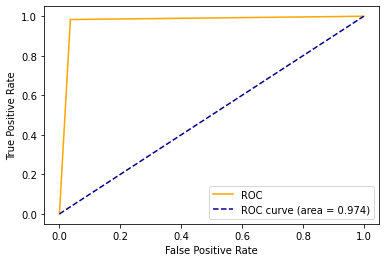

In [71]:
fpr, tpr, threshold = roc_curve(y,y_pred)
auc = roc_auc_score(y,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [72]:
x['Churn_pred']=y_pred
x['Churn']=y
x[['Churn','Churn_pred']]

,Churn,Churn_pred
0,0,0
1,0,0
3,0,0
6,0,0
7,0,0
...,...,...
6526,1,1
3301,1,1
3621,1,1
6600,1,1


##### Check Distribution plots

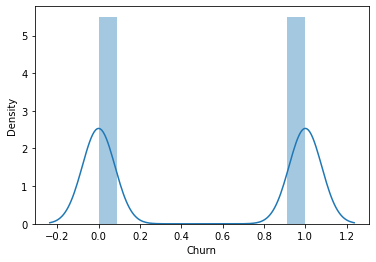

<AxesSubplot:xlabel='Churn_pred', ylabel='Density'>

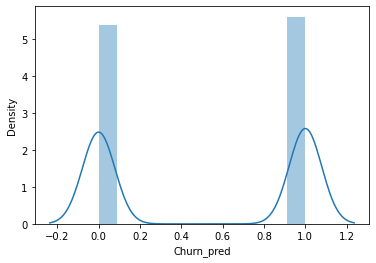

In [74]:
sn.distplot(x['Churn'])
plt.show()
sn.distplot(x['Churn_pred'])

#### Confusion matrix

In [75]:
print("Confusion matrix \n",confusion_matrix(x['Churn'],x['Churn_pred']))

Confusion matrix 
 [[4988  186]
 [  86 5088]]


In [76]:
x.Churn.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [77]:
x.Churn_pred.value_counts()

1    5274
0    5074
Name: Churn_pred, dtype: int64

#### Saving the model

In [78]:
joblib.dump(classmodel, 'cust_churn.pkl')

['cust_churn.pkl']